In [5]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import IMP directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
###to display all the columns and rows####
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",150)

In [33]:
data=pd.read_csv("AB_NYC_2019.csv")

In [8]:
data.head(5)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Changing the data type using tableau so not doing here
#data.id=data.id.astype(object) not changing here changing from the tableau
#data['host_id']=data['host_id'].astype(object)
#data['latitude']=data['latitude'].astype(object)
#data['longitude']=data['longitude'].astype(object)
#data['last_review'].astype('datetime64')


In [34]:
#Checking presence of Null Values
data.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
data[data['last_review'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
data[data['last_review'].isnull()].number_of_reviews.nunique()
# filling it with the last date as it is important matrix and to keep it in mind putting is '01-01-2010'
data['last_review']=data['last_review'].fillna('01-01-2010')

In [14]:
data["reviews_per_month"]=data["reviews_per_month"].fillna(0)

In [15]:
data[data["host_name"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,08-07-2019,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,02-01-2017,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,23-05-2019,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,01-01-2010,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,20-10-2015,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,19-06-2019,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,01-07-2015,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,19-06-2019,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,01-01-2010,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,01-08-2015,0.02,1,0


In [16]:
data["host_name"]=data["host_name"].fillna(data['host_id'])

In [17]:
#number_of_reviews are 0 so there is no last date available for these propertiesa 

In [18]:
data["name"]=data["name"].fillna(data['id'])

In [19]:
data[data["host_name"]==415290]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
27777,21787094,Spacious and Bright Midtown East Apartment,415290,415290,Manhattan,Upper East Side,40.76436,-73.96836,Entire home/apt,325,1,0,01-01-2010,0.0,1,0


In [20]:
data.isnull().mean()*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [21]:
#numerical column 
data.info()
#Categorical Column
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [36]:
#Segregating different types of variabele
id_col=['id', 'name', 'host_id', 'host_name']
cat_col=[ 'neighbourhood_group',
       'neighbourhood','room_type']
num_col=['price','minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [23]:
# data without reviews are of no use.
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
# price and minimum_nights spend , n

************************************************************
Analysing outliers for  price
************************************************************
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: object
************************************************************


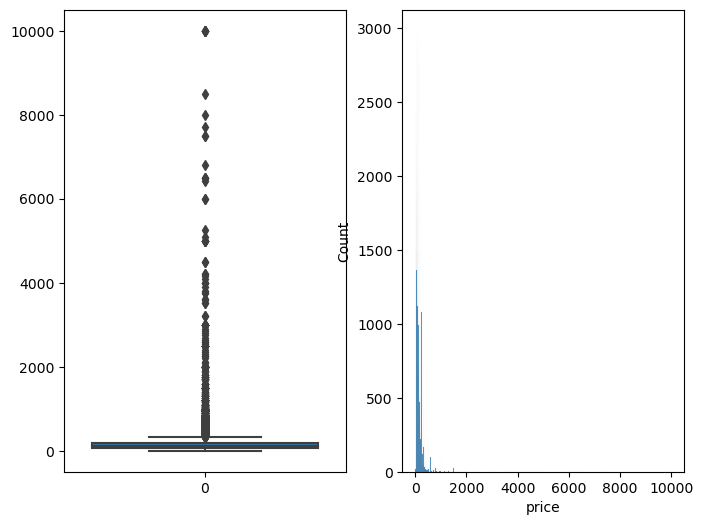

************************************************************
Analysing outliers for  minimum_nights
************************************************************
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: object
************************************************************


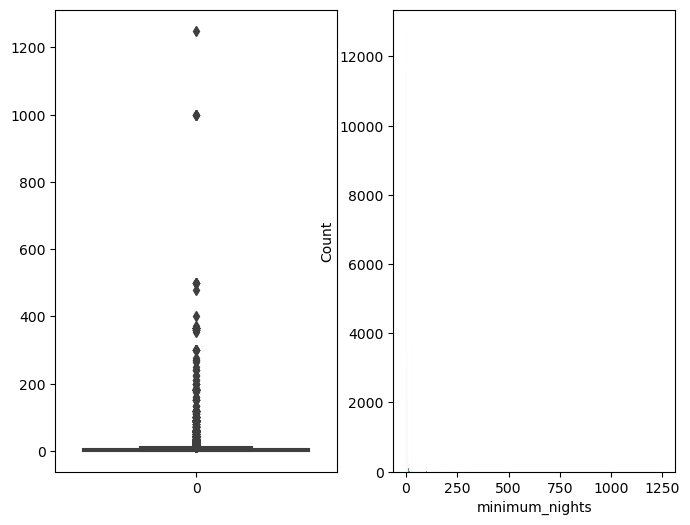

************************************************************
Analysing outliers for  number_of_reviews
************************************************************
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: object
************************************************************


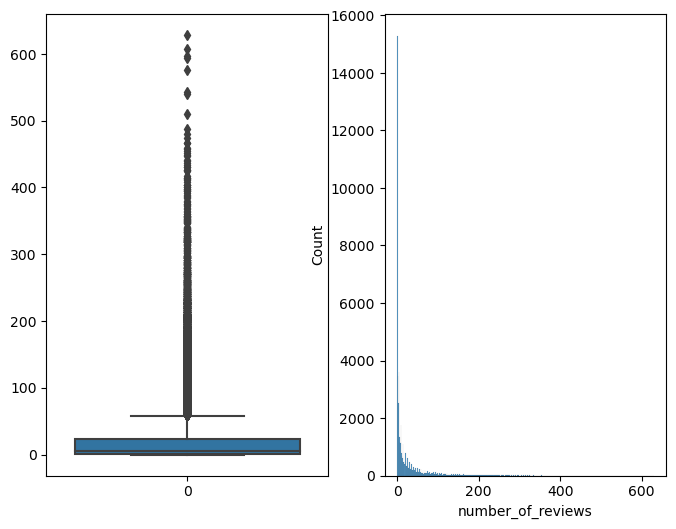

************************************************************
Analysing outliers for  reviews_per_month
************************************************************
count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: object
************************************************************


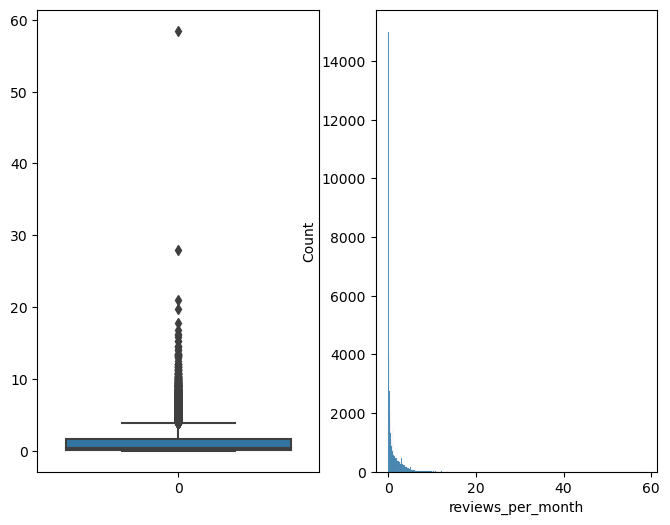

************************************************************
Analysing outliers for  calculated_host_listings_count
************************************************************
count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: object
************************************************************


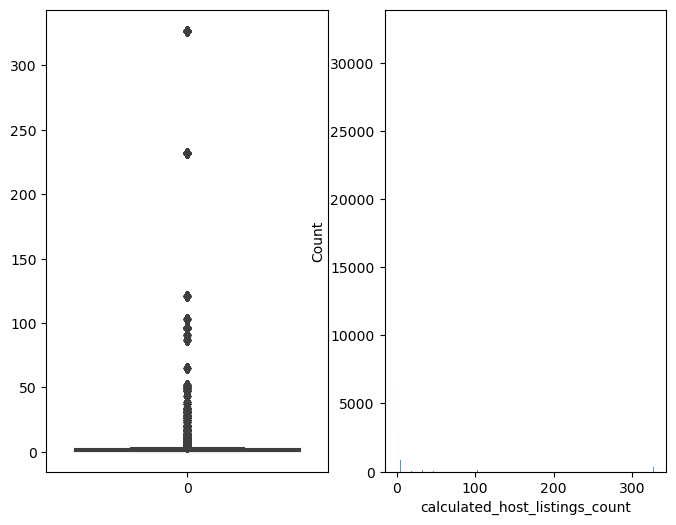

************************************************************
Analysing outliers for  availability_365
************************************************************
count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: object
************************************************************


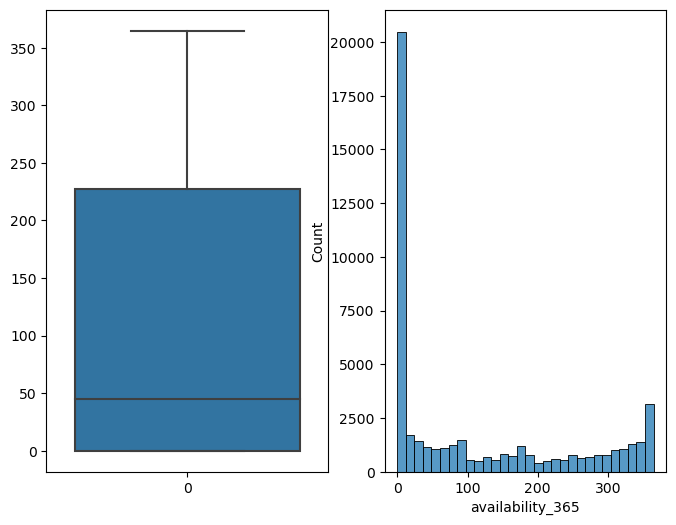

In [25]:
## Countinous variable plotting all together a histogram  its boxplot and looking its values 
for i in num_col:
    plt.figure(figsize=[8,6])
    print('*'*60)
    print('Analysing outliers for ',i)
    print('*'*60)
    print(data[i].describe().apply(lambda x: format(x, 'f')))
    print('*'*60)
    plt.subplot(1,2,1)
    sns.boxplot(data[i])
    plt.subplot(1,2,2)
    sns.histplot(data[i])
   
    
    plt.show()

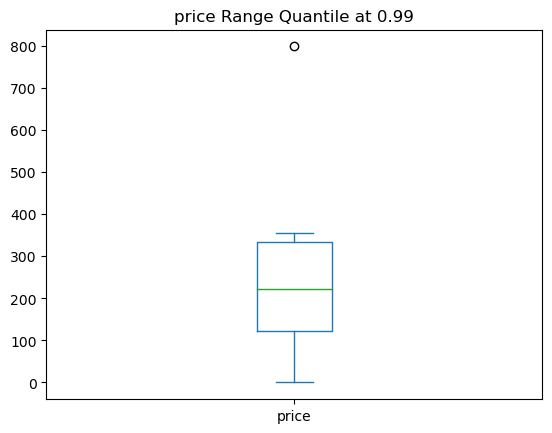

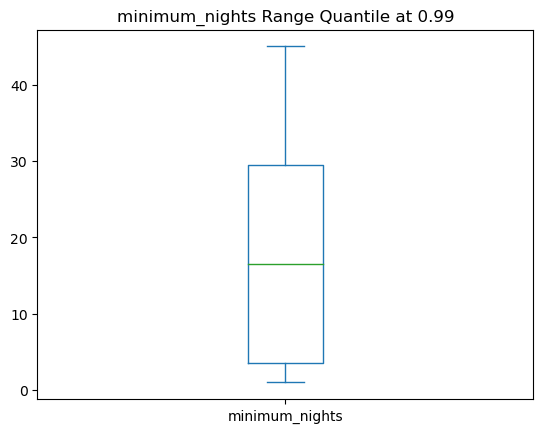

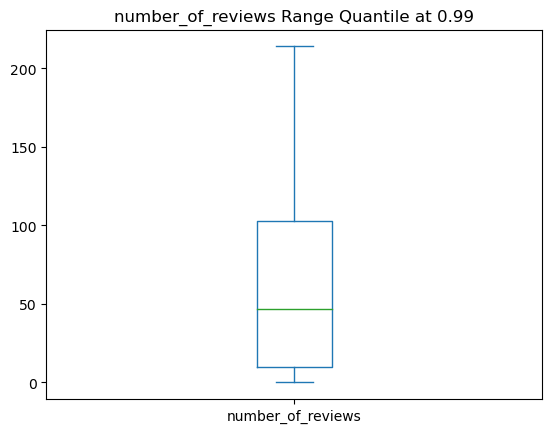

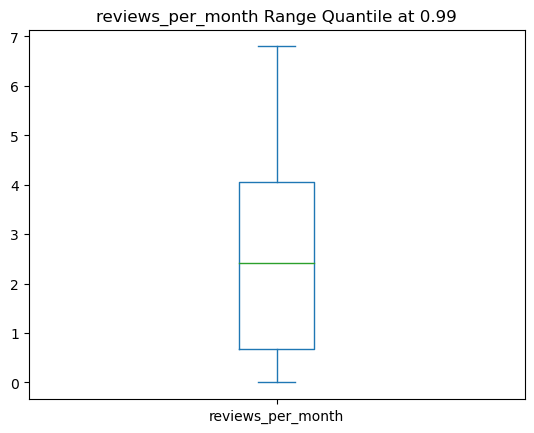

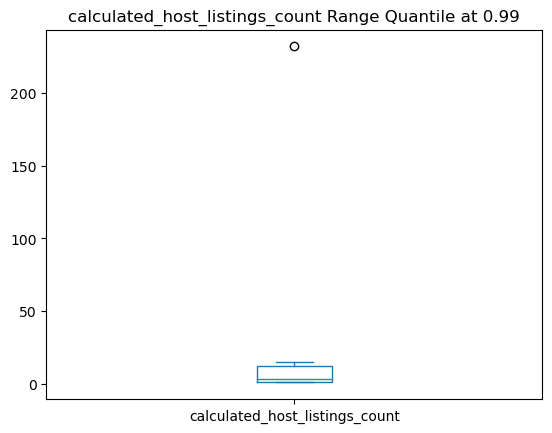

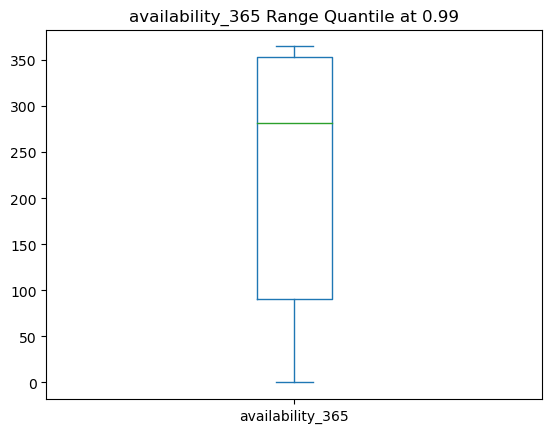

In [26]:
for i in num_col:
    data[i].quantile([0,0.5,0.75,0.90,0.95,0.99]).plot.box()
    plt.title(i+" Range Quantile at 0.99")
    plt.show()
    

In [27]:
for i in num_col:
    print(data[i][data[i]>data[i].quantile(0.99)].count())
    print(i+" outliers > then .99 quantile")
## not treating these outliers as these can be the possibility.

474
price outliers > then .99 quantile
469
minimum_nights outliers > then .99 quantile
480
number_of_reviews outliers > then .99 quantile
486
reviews_per_month outliers > then .99 quantile
327
calculated_host_listings_count outliers > then .99 quantile
0
availability_365 outliers > then .99 quantile


In [28]:
# not Treating the outlier as of now
data["price"][data["price"]>data["price"].quantile(0.99)].value_counts()
#sns.barblot(x=x,y=y)

1000     59
800      54
1500     26
2000     24
900      20
850      19
999      17
1200     15
1100     12
2500     11
950      11
3000      8
5000      6
1250      6
995       6
899       5
1700      4
975       4
1600      4
956       3
6500      3
1050      3
895       3
9999      3
10000     3
945       3
1750      3
1999      3
890       3
4000      3
1300      3
1150      2
1800      2
7500      2
840       2
1195      2
2250      2
949       2
825       2
4200      2
980       2
2999      2
1599      2
1400      2
860       2
4500      2
3750      2
1350      2
6000      2
1299      1
848       1
1494      1
1978      1
1295      1
2545      1
1115      1
3200      1
913       1
1080      1
820       1
1880      1
3512      1
1075      1
805       1
3600      1
1799      1
1497      1
2850      1
1369      1
1308      1
843       1
2995      1
930       1
920       1
1099      1
830       1
1900      1
875       1
6800      1
974       1
898       1
5100      1
1306      1
1145

#### Uni variate

value_counts of neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64


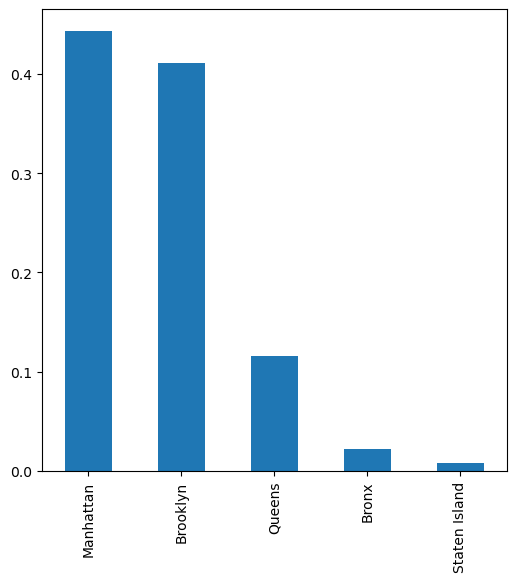

value_counts of neighbourhood
Williamsburg                  0.080172
Bedford-Stuyvesant            0.075959
Harlem                        0.054361
Bushwick                      0.050414
Upper West Side               0.040311
Hell's Kitchen                0.040045
East Village                  0.037898
Upper East Side               0.036773
Crown Heights                 0.031987
Midtown                       0.031598
East Harlem                   0.022845
Greenpoint                    0.022804
Chelsea                       0.022763
Lower East Side               0.018632
Astoria                       0.018407
Washington Heights            0.018386
West Village                  0.015707
Financial District            0.015216
Flatbush                      0.012701
Clinton Hill                  0.011699
Long Island City              0.010983
Prospect-Lefferts Gardens     0.010942
Park Slope                    0.010349
East Flatbush                 0.010226
Fort Greene                   0.01

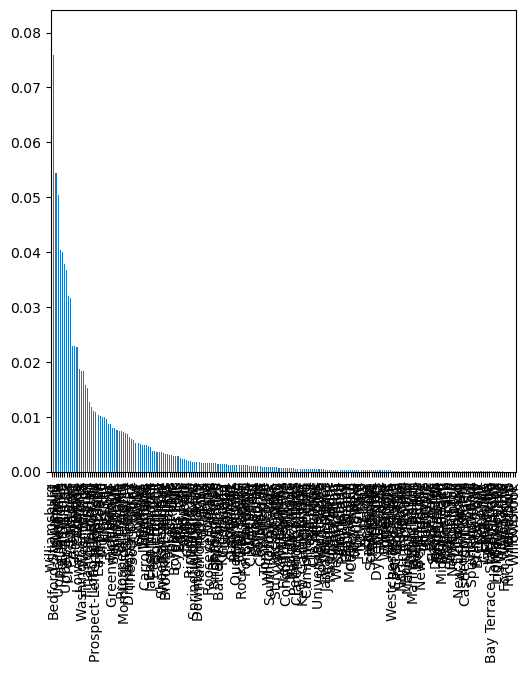

value_counts of room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64


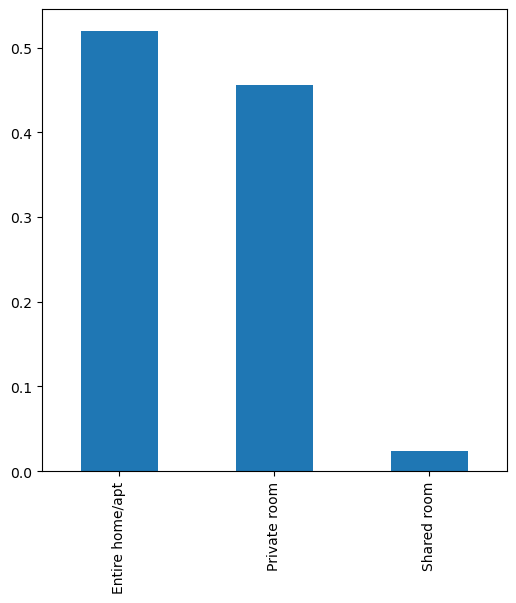

In [29]:
for i in cat_col:
    print("value_counts of "+i)
    print(data[i].value_counts(normalize=True))
    plt.figure(figsize=[6,6])
    data[i].value_counts(normalize=True).plot.bar()
    plt.show()


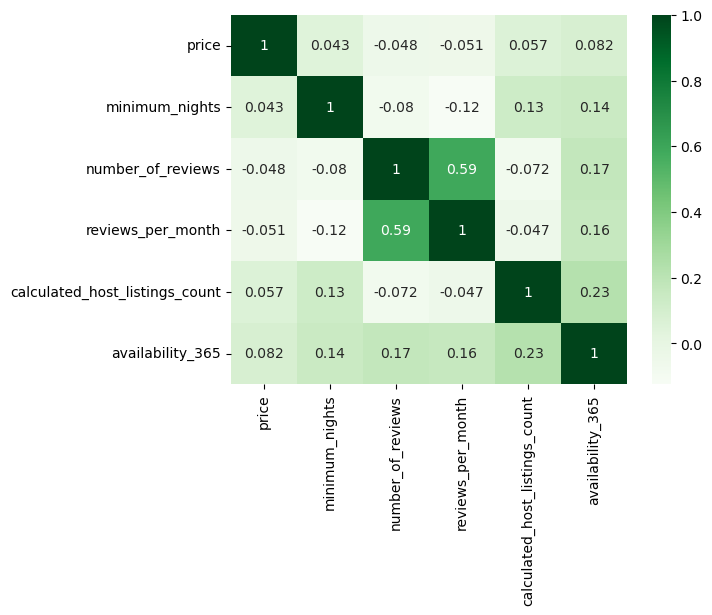

In [30]:
sns.heatmap(data[num_col].corr(),annot=True,cmap='Greens')
plt.show()

In [31]:
data.to_csv("airbnb_cleaned_data.csv")